## Imports

In [1]:
# %pip install openpyxl
# %pip install tabulate

In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("whitegrid")

In [4]:
RESULTS_PIXTRAL = "results_pixtral.csv"
RESULTS_SIGLIP = "results_siglip_chunks.csv"

In [5]:
PLOTS_DIR = "plots"
if os.path.exists(PLOTS_DIR):
    pass
else:
    os.mkdir(PLOTS_DIR)

## Excel for labelling

Далее данные размечаются вручную согласно policy (см. baselines/labelling_policy_image_input_testing.md)

# Results

In [6]:
df_init = pd.read_csv("sites_for_testing/sites_data.csv", sep=";")

In [7]:
df_init.head()

,title,image_path,description,difficulty,type
0,Sagrada Familia,sagrada_familia.jpg,Barcelona's most popular and famous attraction...,easy,religious
1,The Eiffel Tower,eiffel_tower.jpg,A symbol of Paris and one of the most famous ...,easy,tower
2,Petra,petra.jpg,"Petra is the fabled ""rose red city, half as ol...",easy,ancient_city
3,Great Wall,great_wall.jpg,The Great Wall of China snakes its way through...,easy,ancient_city
4,Big Ben,big_ben.jpg,Big Ben is the nickname for the Great Bell ins...,easy,tower


## Pixtral

In [8]:
dfp = pd.read_excel(RESULTS_PIXTRAL[:-4] + ".xlsx")

In [9]:
dfp.head()

,Unnamed: 0,image_path,model,latency_sec,prompt_tokens,completion_tokens,total_tokens,summary,elements,raw_response,label,Unnamed: 11
0,0,stonehenge.jpg,pixtral-12b-2409,1.657614,3235,166,3401,"The image depicts Stonehenge, an ancient stone...","[{'element': 'Stonehenge', 'description': 'A p...","{'elements': [{'element': 'Stonehenge', 'descr...",L0,NaN
1,1,big_ben.jpg,pixtral-12b-2409,1.489580,1666,147,1813,The image depicts the iconic Big Ben clock tow...,"[{'element': 'Big Ben', 'description': 'Big Be...","{'elements': [{'element': 'Big Ben', 'descript...",L0,NaN
2,2,grand_canyon.jpg,pixtral-12b-2409,3.110798,2195,101,2296,"The image depicts the Grand Canyon at sunset, ...","[{'element': 'Grand Canyon', 'description': 'A...","{'elements': [{'element': 'Grand Canyon', 'des...",L0,NaN
3,3,hollywood_sign.jpg,pixtral-12b-2409,2.097872,2715,78,2793,The image features the famous Hollywood Sign o...,"[{'element': 'Hollywood Sign', 'description': ...","{'elements': [{'element': 'Hollywood Sign', 'd...",L0,NaN
4,4,hofburg.jpg,pixtral-12b-2409,3.902720,2975,219,3194,"The image depicts Heldenplatz, a significant p...","[{'element': 'Heldenplatz', 'description': 'A ...","{'elements': [{'element': 'Heldenplatz', 'desc...",L0,NaN


In [10]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         20 non-null     int64  
 1   image_path         20 non-null     object 
 2   model              20 non-null     object 
 3   latency_sec        20 non-null     float64
 4   prompt_tokens      20 non-null     int64  
 5   completion_tokens  20 non-null     int64  
 6   total_tokens       20 non-null     int64  
 7   summary            20 non-null     object 
 8   elements           20 non-null     object 
 9   raw_response       20 non-null     object 
 10  label              20 non-null     object 
 11  Unnamed: 11        1 non-null      float64
dtypes: float64(2), int64(4), object(6)
memory usage: 2.0+ KB


In [11]:
dfp["latency_sec"].mean()

np.float64(2.919048402219778)

In [12]:
label_map = {
    "L0": 0,
    "L1": 1,
    "L2": 2,
    "L3": 3,
}

In [13]:
dfp["label"] = dfp["label"].map(label_map)

## SigLip

In [14]:
dfs = pd.read_excel(RESULTS_SIGLIP[:-4] + ".xlsx")

In [15]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20 non-null     int64  
 1   image_path      20 non-null     object 
 2   model           20 non-null     object 
 3   latency_emb     20 non-null     float64
 4   latency_search  20 non-null     float64
 5   latency_total   20 non-null     float64
 6   raw_response    20 non-null     object 
 7   texts           20 non-null     object 
 8   label           20 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.5+ KB


In [16]:
dfs.head()

,Unnamed: 0,image_path,model,latency_emb,latency_search,latency_total,raw_response,texts,label
0,0,stonehenge.jpg,google/siglip-base-patch16-384,0.189429,0.027935,0.217364,"[{'score': 0.1235327422618866, 'text': 'you ti...",['you time to see only the Stones and not time...,L0
1,1,big_ben.jpg,google/siglip-base-patch16-384,0.157913,0.028523,0.186436,"[{'score': 0.10741087049245834, 'text': ""of th...","[""of the Main gate. A simulacrum of the famous...",L1
2,2,grand_canyon.jpg,google/siglip-base-patch16-384,0.162071,0.028013,0.190085,"[{'score': 0.1330050826072693, 'text': ""sunset...","[""sunset there—you shouldn't miss it. The larg...",L0
3,3,hollywood_sign.jpg,google/siglip-base-patch16-384,0.155669,0.027888,0.183557,"[{'score': 0.1350061148405075, 'text': ""(a la ...","[""(a la 'Hollywood') that greets travelers com...",L1
4,4,hofburg.jpg,google/siglip-base-patch16-384,0.164804,0.030169,0.194973,"[{'score': 0.15511950850486755, 'text': 'north...",['north-west plinth in the square was intended...,L1


In [17]:
dfs["label"] = dfs["label"].map(label_map)

## Unite df

In [18]:
df = pd.concat([dfp.drop(columns=["Unnamed: 11"]), dfs])

In [20]:
df.groupby("model")["label"].value_counts(normalize=True)

model                           label
google/siglip-base-patch16-384  0        0.55
                                1        0.35
                                2        0.05
                                3        0.05
pixtral-12b-2409                0        0.75
                                2        0.20
                                3        0.05
Name: proportion, dtype: float64

### Quality

In [22]:
def semantic_scores(df):
    return pd.Series({
        "strict_acc": (df.label == 0).mean(),
        "relaxed_acc": (df.label <= 1).mean(),
        "semantic_acc": (df.label <= 2).mean(),
    })

In [23]:
df.groupby("model").apply(semantic_scores)

/var/folders/ld/jmjl5j656sv7yzc3p_2dds_80000gp/T/ipykernel_89282/2333337873.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("model").apply(semantic_scores)


,strict_acc,relaxed_acc,semantic_acc
model,,,
google/siglip-base-patch16-384,0.55,0.90,0.95
pixtral-12b-2409,0.75,0.75,0.95


### Latency

In [24]:
dfp.groupby("model")["latency_sec"].agg(
    ["mean", "median", "std",]
)

,mean,median,std
model,,,
pixtral-12b-2409,2.919048,2.513542,1.414617


In [25]:
dfs.groupby("model")["latency_total"].agg(
    ["mean", "median", "std",]
)

,mean,median,std
model,,,
google/siglip-base-patch16-384,0.196891,0.190342,0.017529


In [26]:
dfs.groupby("model")[[
    "latency_emb",
    "latency_search",
    "latency_total"
]].mean()

,latency_emb,latency_search,latency_total
model,,,
google/siglip-base-patch16-384,0.168105,0.028786,0.196891


In [44]:
print(dfs.groupby("model")[[
    "latency_emb",
    "latency_search",
    "latency_total"
]].mean().to_markdown())

| model                          |   latency_emb |   latency_search |   latency_total |
|:-------------------------------|--------------:|-----------------:|----------------:|
| google/siglip-base-patch16-384 |      0.168105 |        0.0287856 |        0.196891 |


In [27]:
(dfs["latency_emb"] / dfs["latency_total"]).mean()

np.float64(0.8528700037715999)

In [28]:
(dfs["latency_search"] / dfs["latency_total"]).mean()

np.float64(0.14712999622839976)

Основная доля времени уходит на формирование эмбеддинга

Так как поиск в векторной базе данных у нас в любом случае происходит - не только для картинки, но и для текста, то время на формирование эмбеддинга картинки значительно влияет на общее время ответа системы при подаче в нее изображения, если выбирать модель SigLip.

### Comparison

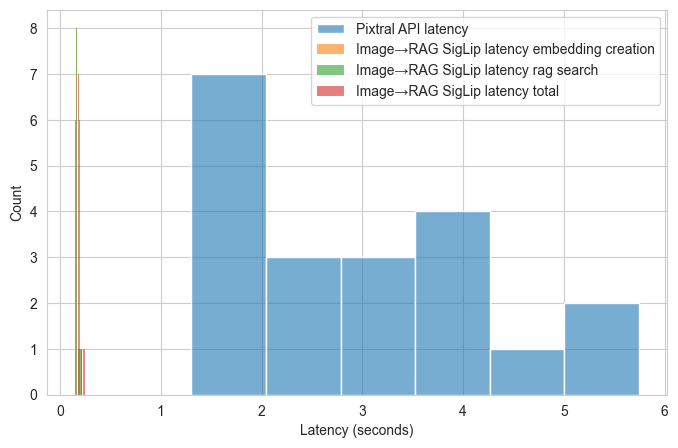

In [29]:
plt.figure(figsize=(8, 5))

sns.histplot(dfp["latency_sec"], label="Pixtral API latency", alpha=0.6)
sns.histplot(dfs["latency_emb"], label="Image→RAG SigLip latency embedding creation", alpha=0.6)
sns.histplot(dfs["latency_emb"], label="Image→RAG SigLip latency rag search", alpha=0.6)
sns.histplot(dfs["latency_total"], label="Image→RAG SigLip latency total", alpha=0.6)


plt.xlabel("Latency (seconds)")
plt.ylabel("Count")
plt.legend()
plt.savefig("plots/latency_by_each_model.png")
plt.show()

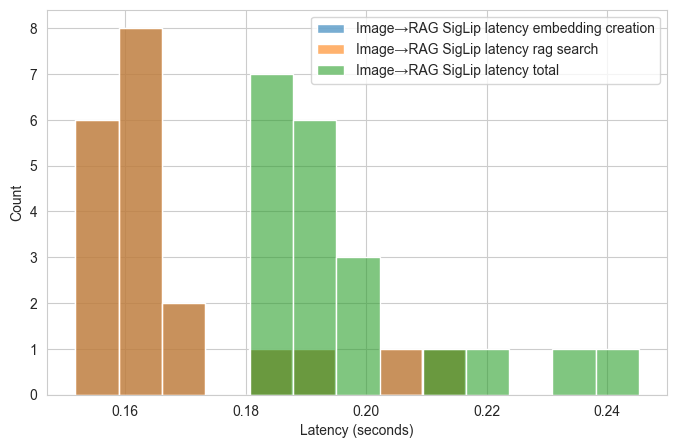

In [30]:
plt.figure(figsize=(8, 5))

# sns.histplot(dfp["latency_sec"], label="Pixtral API latency", alpha=0.6)
sns.histplot(dfs["latency_emb"], label="Image→RAG SigLip latency embedding creation", alpha=0.6)
sns.histplot(dfs["latency_emb"], label="Image→RAG SigLip latency rag search", alpha=0.6)
sns.histplot(dfs["latency_total"], label="Image→RAG SigLip latency total", alpha=0.6)


plt.xlabel("Latency (seconds)")
plt.ylabel("Count")
plt.legend()
plt.savefig("plots/latency_by_siglip.png")
plt.show()

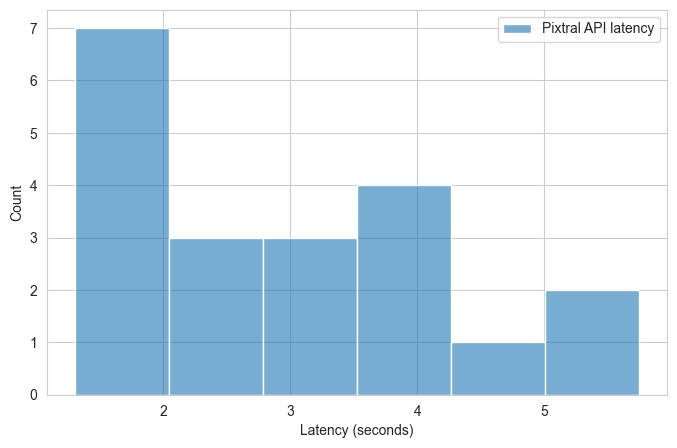

In [31]:
plt.figure(figsize=(8, 5))

sns.histplot(dfp["latency_sec"], label="Pixtral API latency", alpha=0.6)

plt.xlabel("Latency (seconds)")
plt.ylabel("Count")
plt.legend()
plt.savefig("plots/latency_by_pixtral.png")
plt.show()

### Compose results

In [32]:
summary = []

summary.append({
    "approach": "Pixtral",
    "latency": dfp.latency_sec.mean(),
    # "strict_acc": (dfp.label == 0).mean(),
    # "semantic_acc": (dfp.label <= 2).mean(),

})

summary.append({
    "approach": "Image→RAG with SigLip",
    "latency": dfs.latency_total.mean(),
    # "strict_acc": (dfs.label == 0).mean(),
    # "semantic_acc": (dfs.label <= 2).mean(),
})

summary = pd.DataFrame(summary)
summary

,approach,latency
0,Pixtral,2.919048
1,Image→RAG with SigLip,0.196891


In [33]:
print(summary.to_markdown())

|    | approach              |   latency |
|---:|:----------------------|----------:|
|  0 | Pixtral               |  2.91905  |
|  1 | Image→RAG with SigLip |  0.196891 |


### Question type

In [34]:
df_init.columns

Index(['title', 'image_path', 'description', 'difficulty', 'type'], dtype='object')

In [35]:
df = df.merge(
    df_init[["image_path", "type", "difficulty"]],
    how="left",
    on="image_path",
)

In [36]:
df.head(1)

,Unnamed: 0,image_path,model,latency_sec,prompt_tokens,completion_tokens,total_tokens,summary,elements,raw_response,label,latency_emb,latency_search,latency_total,texts,type,difficulty
0,0,stonehenge.jpg,pixtral-12b-2409,1.657614,3235.0,166.0,3401.0,"The image depicts Stonehenge, an ancient stone...","[{'element': 'Stonehenge', 'description': 'A p...","{'elements': [{'element': 'Stonehenge', 'descr...",0,NaN,NaN,NaN,NaN,ancient_city,easy


In [42]:
print(df.groupby("model").apply(semantic_scores).copy().to_markdown())

| model                          |   strict_acc |   relaxed_acc |   semantic_acc |
|:-------------------------------|-------------:|--------------:|---------------:|
| google/siglip-base-patch16-384 |         0.55 |          0.9  |           0.95 |
| pixtral-12b-2409               |         0.75 |          0.75 |           0.95 |


/var/folders/ld/jmjl5j656sv7yzc3p_2dds_80000gp/T/ipykernel_89282/3674833606.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby("model").apply(semantic_scores).copy().to_markdown())


In [37]:
easy = df[df["difficulty"] == "easy"].groupby("model").apply(semantic_scores).copy()
easy

/var/folders/ld/jmjl5j656sv7yzc3p_2dds_80000gp/T/ipykernel_89282/278562858.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  easy = df[df["difficulty"] == "easy"].groupby("model").apply(semantic_scores).copy()


,strict_acc,relaxed_acc,semantic_acc
model,,,
google/siglip-base-patch16-384,0.8,1.0,1.0
pixtral-12b-2409,1.0,1.0,1.0


In [38]:
print(easy.to_markdown())

| model                          |   strict_acc |   relaxed_acc |   semantic_acc |
|:-------------------------------|-------------:|--------------:|---------------:|
| google/siglip-base-patch16-384 |          0.8 |             1 |              1 |
| pixtral-12b-2409               |          1   |             1 |              1 |


In [39]:
hard = df[df["difficulty"] == "hard"].groupby("model").apply(semantic_scores)
hard

/var/folders/ld/jmjl5j656sv7yzc3p_2dds_80000gp/T/ipykernel_89282/1768512637.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hard = df[df["difficulty"] == "hard"].groupby("model").apply(semantic_scores)


,strict_acc,relaxed_acc,semantic_acc
model,,,
google/siglip-base-patch16-384,0.3,0.8,0.9
pixtral-12b-2409,0.5,0.5,0.9


In [40]:
print(hard.to_markdown())

| model                          |   strict_acc |   relaxed_acc |   semantic_acc |
|:-------------------------------|-------------:|--------------:|---------------:|
| google/siglip-base-patch16-384 |          0.3 |           0.8 |            0.9 |
| pixtral-12b-2409               |          0.5 |           0.5 |            0.9 |
